In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib notebook
import scipy.stats as stats   
import scipy.cluster.vq
import datetime
import os
pd.set_option('display.width', 200)
-


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [2]:
#载入数据
dir_path = 'E:/HuangShan/CleanData'
files = os.listdir(dir_path)
data = []
fileMax = 100
fileCnt = 0
for datafile in files:
    path = dir_path + '/' + datafile
    frame = pd.read_csv(path)                 
    data.append(frame)
    fileCnt += 1
    if fileCnt >= fileMax:
        break
data = pd.concat(data, ignore_index = False)
data['date'] = pd.to_datetime(data.date)
data['tw_all'] = ((data.date-data.date.min())/pd.Timedelta(days=1)*(24*60/tw_span)+data.tw).astype(int)
del data['Unnamed: 0']
data['mac6'] = data.mac.str[:6]
data = pd.merge(data, vendor, on='mac6')
data = pd.merge(data, ap_reduce, on='ap_seq')
m_data = data[data.mobile==True]
s = ['2','6','A','E']
data['randMac'] = data.mac.str[1].isin(s)

In [3]:
m_data.head(50)

,mac,tw,date,cnt,ssid,ap_seq,tw_all,mac6,vendor,mobile,area_id
403,0034DA578435,155,2017-01-27,21,.,0,2459,0034DA,LG Electronics,True,11
404,0034DA578435,156,2017-01-27,58,.,0,2460,0034DA,LG Electronics,True,11
405,0034DA578435,157,2017-01-27,43,.,0,2461,0034DA,LG Electronics,True,11
406,0034DA578435,158,2017-01-27,14,.,0,2462,0034DA,LG Electronics,True,11
407,0034DA4178AE,217,2017-01-29,1,.,0,3097,0034DA,LG Electronics,True,11
408,0034DA4178AE,218,2017-01-29,23,WX-yplbg.,0,3098,0034DA,LG Electronics,True,11
409,0034DA4178AE,219,2017-01-29,6,WX-yplbg.,0,3099,0034DA,LG Electronics,True,11
410,0034DA4178AE,220,2017-01-29,10,WX-yplbg.,0,3100,0034DA,LG Electronics,True,11
411,0034DA4178AE,221,2017-01-29,22,WX-yplbg.,0,3101,0034DA,LG Electronics,True,11
412,0034DA4178AE,226,2017-01-29,14,WX-yplbg.,0,3106,0034DA,LG Electronics,True,11


In [4]:
m_data = m_data[(m_data.tw_all < 3168)&(m_data.tw_all>2880)]

In [5]:
m_data.head()

,mac,tw,date,cnt,ssid,ap_seq,tw_all,mac6,vendor,mobile,area_id
407,0034DA4178AE,217,2017-01-29,1,.,0,3097,0034DA,LG Electronics,True,11
408,0034DA4178AE,218,2017-01-29,23,WX-yplbg.,0,3098,0034DA,LG Electronics,True,11
409,0034DA4178AE,219,2017-01-29,6,WX-yplbg.,0,3099,0034DA,LG Electronics,True,11
410,0034DA4178AE,220,2017-01-29,10,WX-yplbg.,0,3100,0034DA,LG Electronics,True,11
411,0034DA4178AE,221,2017-01-29,22,WX-yplbg.,0,3101,0034DA,LG Electronics,True,11


In [6]:
#去掉只在新国线或索道下站出现的mac (mac数量从184016下降到151251)
temp = m_data[m_data.ap_seq.isin([1,2,3,14,15,18])==False]
mac = temp.groupby(['mac','date']).apply(len).reset_index(name='cnt').groupby('mac').apply(len).reset_index(name='day_cnt')
location = temp.groupby(['mac','ap_seq']).apply(len).reset_index(name='cnt').groupby('mac').apply(len).reset_index(name='location_cnt')
mac = pd.merge(mac, location, on='mac')
g_data = m_data[m_data.mac.isin(mac.mac)]
g_data = g_data.sort_values(['mac','tw_all'])

In [7]:
def area_next(frame):
    frame = frame.sort_values('tw_all')
    frame['area_next'] = frame.area_id.shift(-1)
    frame = frame[frame.area_next != frame.area_id]
    frame['tw_next'] = frame.tw_all.shift(-1)
    return frame
area_flow = g_data.groupby('mac').apply(area_next)
area_flow['gap'] = area_flow.tw_next - area_flow 

ValueError: cannot join with no level specified and no overlapping names

In [155]:
area_stay = g_data.groupby('area_id').apply(len).reset_index(name='cnt') 
area.columns = ['area','x','y','area_id']
area_stay = pd.merge(area_stay, area, on='area_id')

C:\Anaconda2\Lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


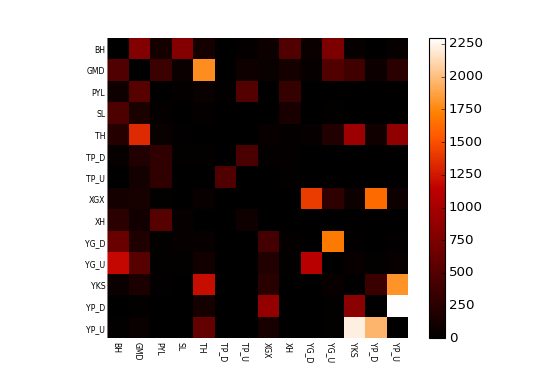

In [156]:
net = area_flow.groupby(by=['area_id','area_next']).apply(len).reset_index(name='weight')
gap = area_flow.groupby(by=['area_id','area_next']).gap.mean().reset_index(name='gap')
net = pd.merge(net, gap, on=['area_id','area_next'])
traffic = np.zeros([len(area),len(area)])
for i in range(len(net)):
    traffic[net.area_id[i],net.area_next[i]] = net.weight[i]
plt.imshow(traffic, cmap='gist_heat', interpolation='none');
plt.colorbar()
plt.axis('off')
for i in range(len(area)):
    plt.text(-0.6,i+0.2,area.area[i], ha='right',size=7)
    plt.text(i+0.1,14.0,area.area[i], ha='right',size=7, rotation=-90)

In [157]:
net = area_flow.groupby(by=['area_id','area_next']).apply(len).reset_index(name='weight')
gap = area_flow.groupby(by=['area_id','area_next']).gap.mean().reset_index(name='gap')
net = pd.merge(net, gap, on=['area_id','area_next'])
area.columns = ['area','x','y','area_id']
net = pd.merge(net, area)
area.columns = ['area','x','y','area_next']
net = pd.merge(net, area, on='area_next')

<IPython.core.display.Javascript object>


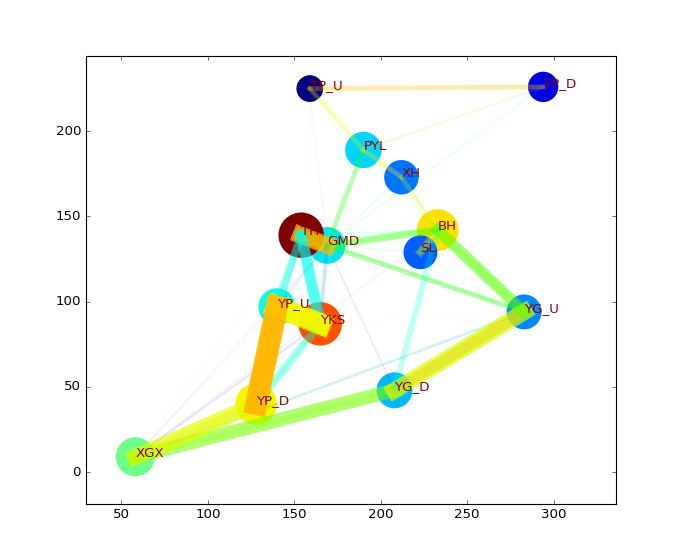

In [218]:
from matplotlib.pyplot import cm
max_weight = float(net.weight.max())
max_gap = float(60)
for i in range(len(net)):
    plt.plot([net.x_x[i], net.x_y[i]],[net.y_x[i], net.y_y[i]], alpha = net.weight[i]/2500.0, linewidth=net.weight[i]/max_weight*20, c=cm.hsv(net.gap[i]/max_gap));
for i in range(len(area)):
    plt.text(area.x[i], area.y[i], area.area[i], color='darkred')
plt.scatter(area_stay.x, area_stay.y, s=np.sqrt(area_stay.cnt)*10, c=area_stay.cnt, cmap='jet', linewidth=0)

<IPython.core.display.Javascript object>


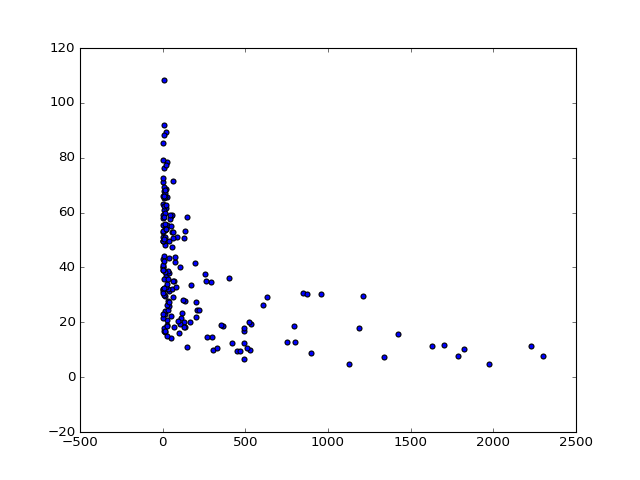

In [160]:
plt.scatter(net.weight, net.gap)

In [162]:
#计算各个区域之间的相关系数
correlation = np.zeros([len(ap), len(ap)])
def calculate_corr(group):
    global correlation
    corr = np.zeros([len(ap), len(ap)])
    ap_stay = group.groupby('ap_seq').apply(len)
    ap_stay = ap_stay[ap_stay>=2].index   #超过一定数量时间窗的stay被认为是有意义的
    for i in range(len(ap_stay)):
        for j in range(len(ap_stay)):
            if (i!=j):
                corr[ap_stay[i], ap_stay[j]] += 0.1
    correlation = correlation + corr
    return group

In [165]:
#计算各个区域之间的相关系数
correlation = np.zeros([len(area), len(area)])
def calculate_corr(group):
    global correlation
    corr = np.zeros([len(area), len(area)])
    ap_stay = group.groupby('area_id').apply(len).reset_index()
    #ap_stay = ap_stay[ap_stay>=2].index   #超过一定数量时间窗的stay被认为是有意义的
    for i in range(len(ap_stay)):
        for j in range(len(ap_stay)):
            if (i!=j):
                corr[ap_stay.area_id[i], ap_stay.area_id[j]] += 0.1
    correlation = correlation + corr
    return group
g_data.groupby('mac').apply(calculate_corr)

,mac,tw,date,cnt,ssid,ap_seq,tw_all,mac6,vendor,mobile,area_id
83233,00166D148829,88,2017-01-29,3,.,18,2968,00166D,Yulong,True,5
83234,00166D148829,89,2017-01-29,1,.,18,2969,00166D,Yulong,True,5
83235,00166D148829,90,2017-01-29,5,.,18,2970,00166D,Yulong,True,5
83236,00166D148829,100,2017-01-29,3,.,18,2980,00166D,Yulong,True,5
3368604,00166D148829,108,2017-01-29,3,.,11,2988,00166D,Yulong,True,2
160989,00166D148829,126,2017-01-29,5,.,8,3006,00166D,Yulong,True,1
160990,00166D148829,127,2017-01-29,3,.,8,3007,00166D,Yulong,True,1
595319,00166D148829,134,2017-01-29,5,.,16,3014,00166D,Yulong,True,4
595320,00166D148829,135,2017-01-29,11,.,16,3015,00166D,Yulong,True,4
595321,00166D148829,136,2017-01-29,7,.,16,3016,00166D,Yulong,True,4


<IPython.core.display.Javascript object>


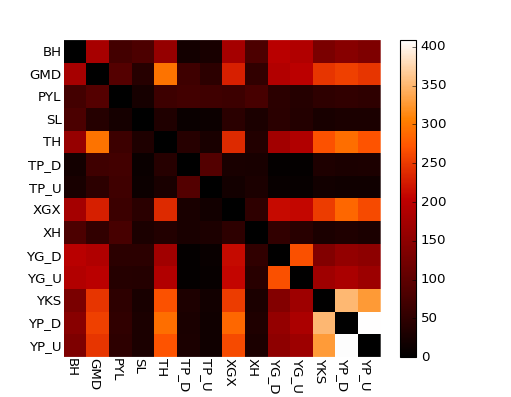

In [168]:
plt.imshow(correlation, cmap='gist_heat', interpolation='none')
plt.colorbar()
plt.axis('off')
for i in range(len(area)):
    plt.text(-0.6,i+0.2,area.area[i], ha='right',size=12)
    plt.text(i+0.1,14.0,area.area[i], ha='right',size=12, rotation=-90)

<IPython.core.display.Javascript object>


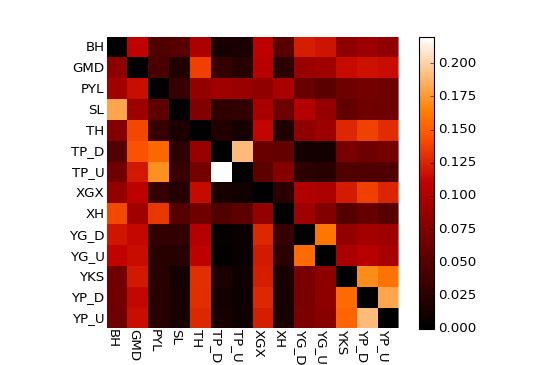

In [172]:
d = correlation.sum(axis=1)
corr = correlation.copy()
for i in range(len(area)):
    for j in range(len(area)):
        corr[i,j] = correlation[i,j] / d[i]        

plt.imshow(corr, interpolation='none', cmap='gist_heat')
plt.colorbar()
plt.axis('off')
for i in range(len(area)):
    plt.text(-0.6,i+0.2,area.area[i], ha='right',size=12)
    plt.text(i+0.1,14.0,area.area[i], ha='right',size=12, rotation=-90)

In [175]:
mac.day_cnt.max()

1

<IPython.core.display.Javascript object>


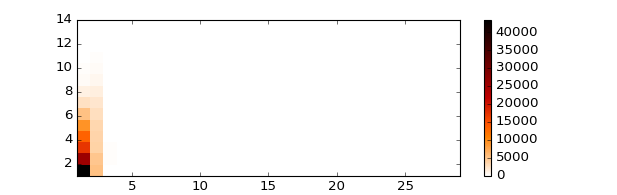

In [187]:
plt.hist2d(mac.day_cnt, mac.location_cnt, bins=[29,14],  cmap='gist_heat_r');
plt.colorbar()

<IPython.core.display.Javascript object>


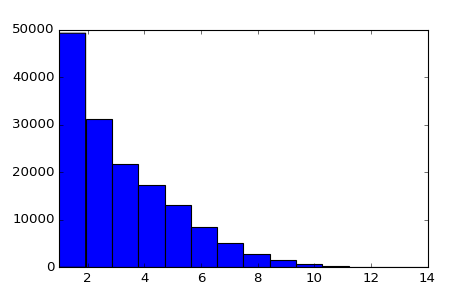

In [191]:
plt.hist(mac.location_cnt, bins=14);

<IPython.core.display.Javascript object>


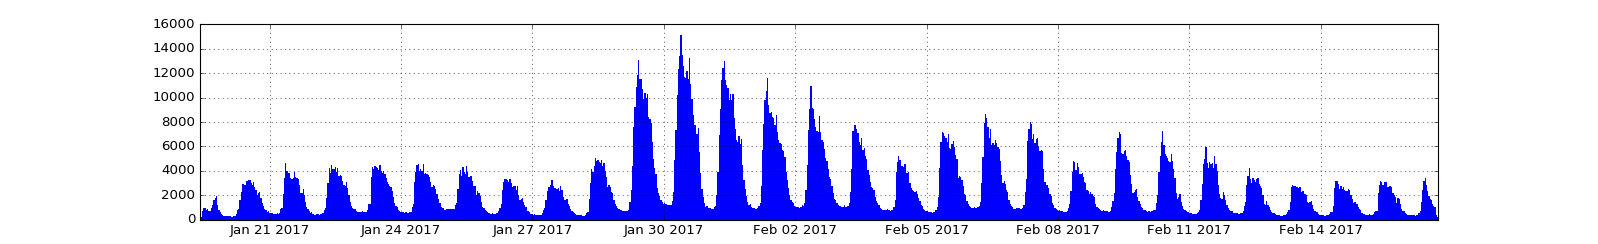

In [183]:
flow_all = g_data.groupby(['mac','tw_all']).apply(len).reset_index(name='cnt')
flow_all['time'] = g_data.date.min() + flow_all.tw_all*pd.Timedelta(minutes=5)
flow_all.time.hist(bins=1000, linewidth=0);

<IPython.core.display.Javascript object>


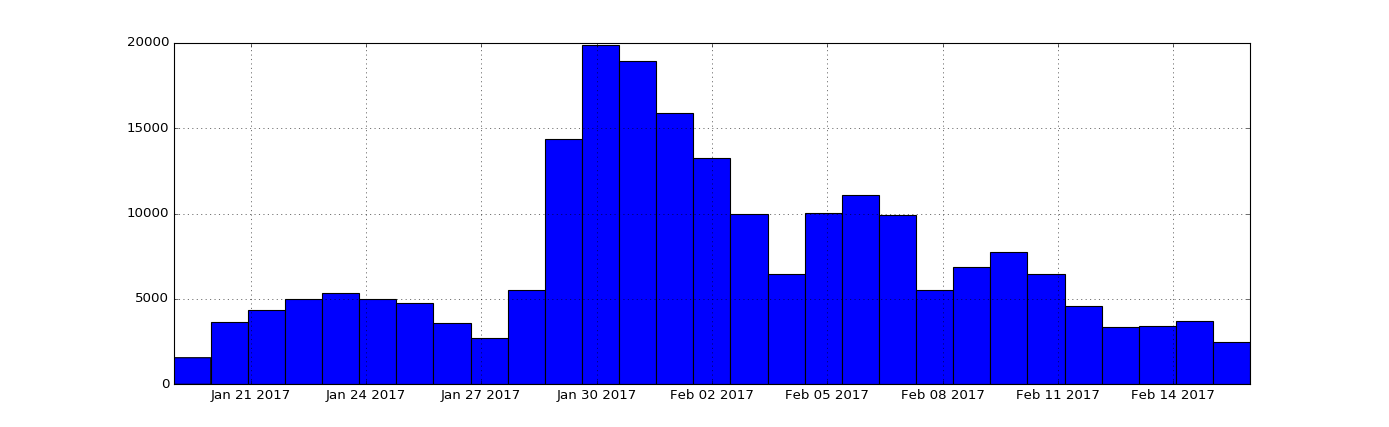

In [196]:
flow_all = g_data.groupby(['mac','date']).apply(len).reset_index(name='cnt')
flow_all.date.hist(bins=29);

<IPython.core.display.Javascript object>


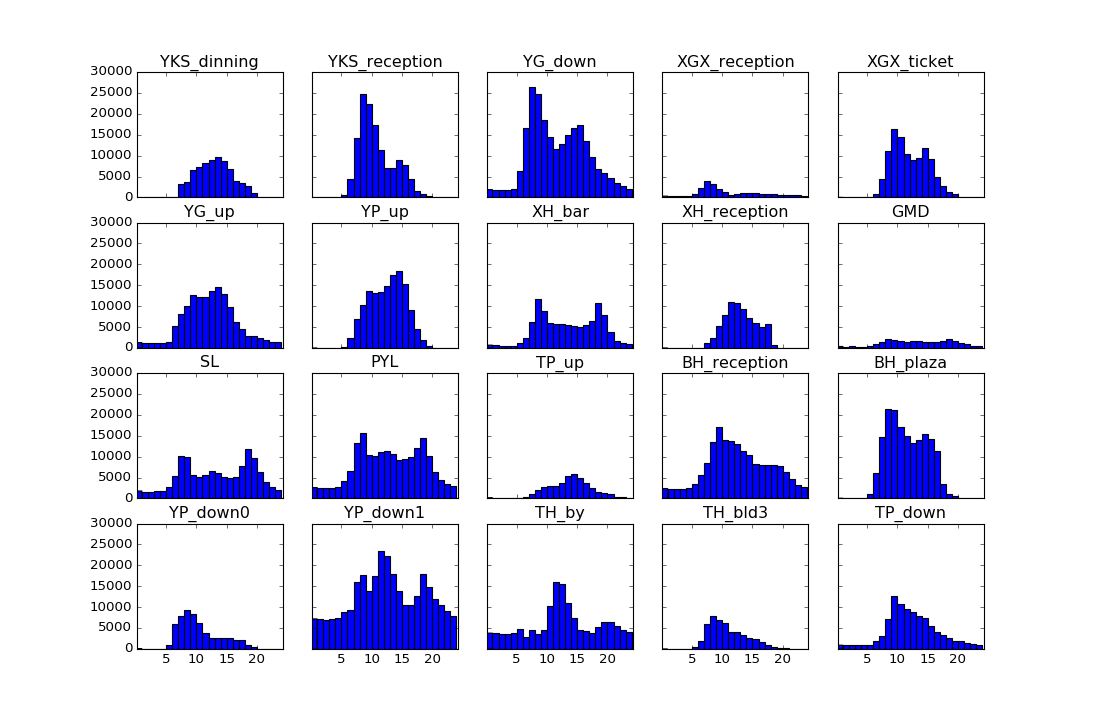

In [198]:
fig, axes = plt.subplots(4, 5, sharex='all', sharey='all')
for i in range(len(ap)):
    temp = g_data[g_data.ap_seq==i].groupby(['mac','tw']).apply(len).reset_index(name='cnt')
    axes[i/5, i%5].hist(temp.tw/12, bins=24, range=[0,24]);
    axes[i/5, i%5].set_title(ap.location[i]);

In [201]:
g_data['day'] = (g_data.date - g_data.date.min()) / pd.Timedelta(days=1)

<IPython.core.display.Javascript object>


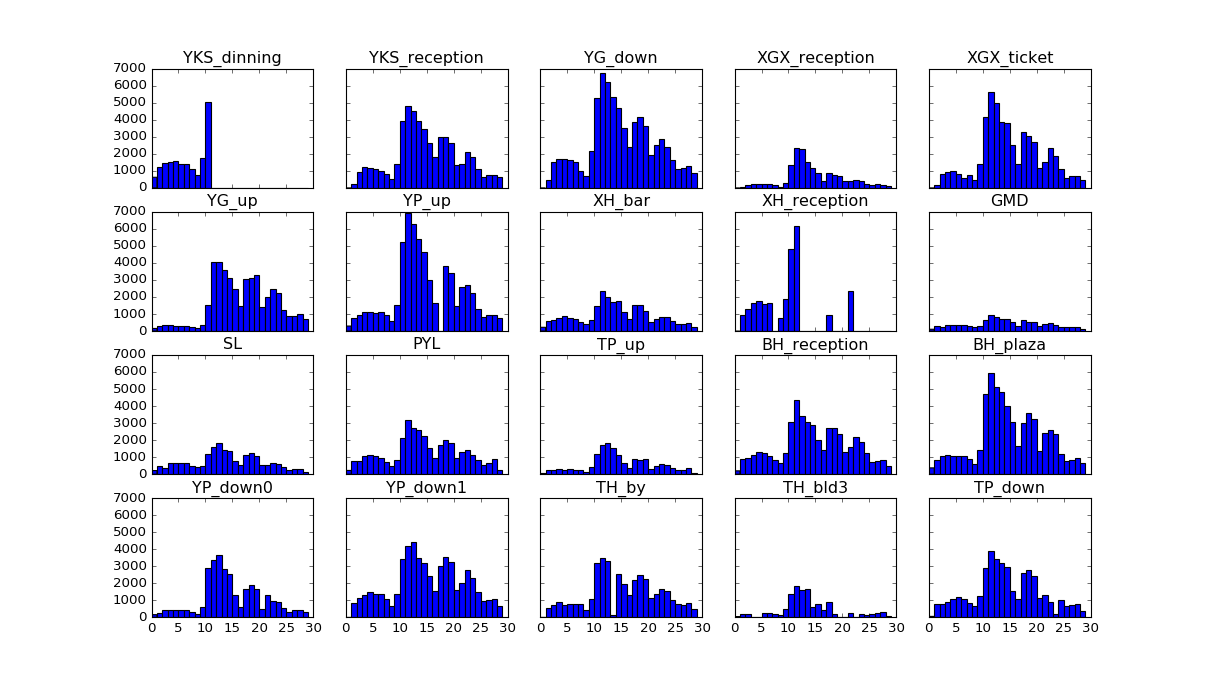

In [202]:
fig, axes = plt.subplots(4, 5, sharex='all', sharey='all')
for i in range(len(ap)):
    temp = g_data[g_data.ap_seq==i].groupby(['day','mac']).apply(len).reset_index(name='cnt')
    axes[i/5, i%5].hist(temp.day, bins=29, range=[0,29]);
    axes[i/5, i%5].set_title(ap.location[i]);

In [240]:
tr = pd.DataFrame({'tmin':g_data.groupby('mac').tw_all.min(), 'tmax':g_data.groupby('mac').tw_all.max()})
tr['span'] = tr.tmax - tr.tmin

<IPython.core.display.Javascript object>


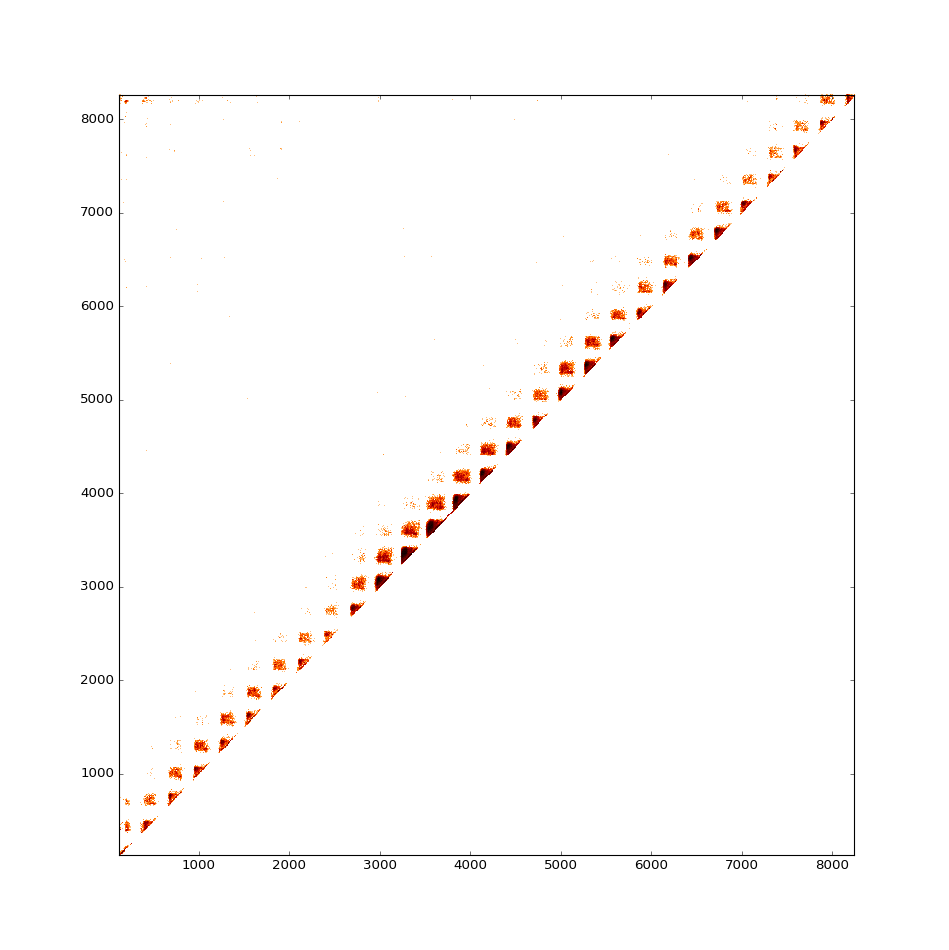

In [241]:
plt.hist2d(tr.tmin, tr.tmax,bins=800, norm=LogNorm(), cmap='gist_heat_r');

<IPython.core.display.Javascript object>


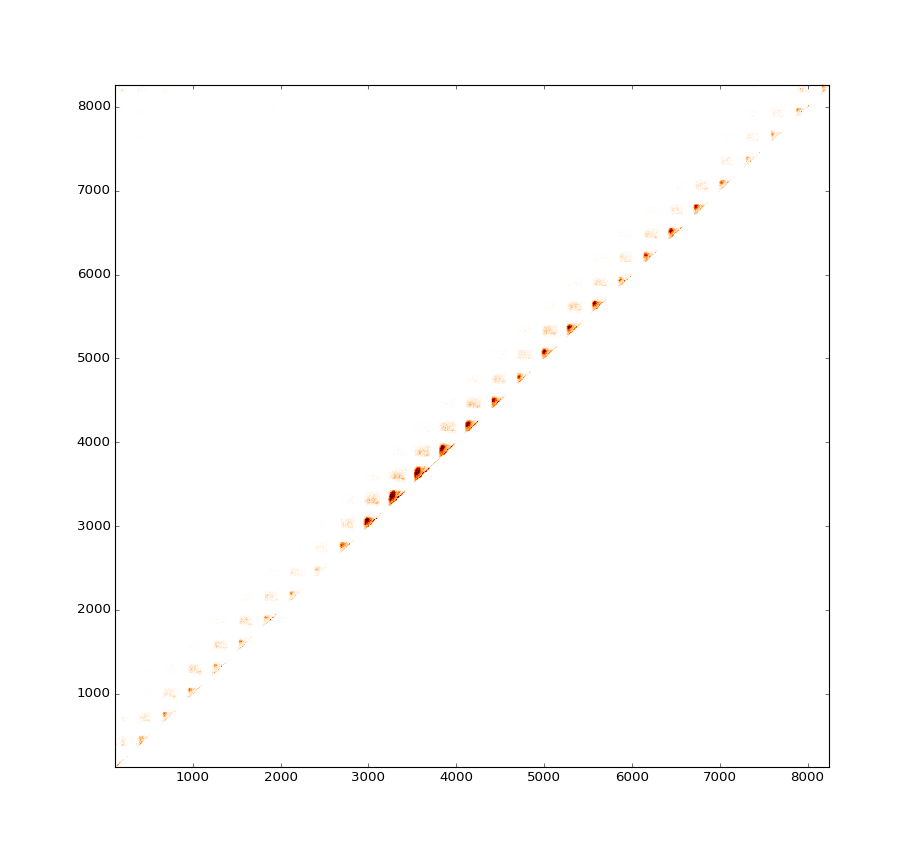

In [242]:
plt.hist2d(tr.tmin, tr.tmax,bins=800, cmap='gist_heat_r');

In [231]:
tr = pd.DataFrame({'tmin':g_data.groupby('mac').tw.min(), 'tmax':g_data.groupby('mac').tw.max()})
tr['span'] = tr.tmax - tr.tmin

<IPython.core.display.Javascript object>


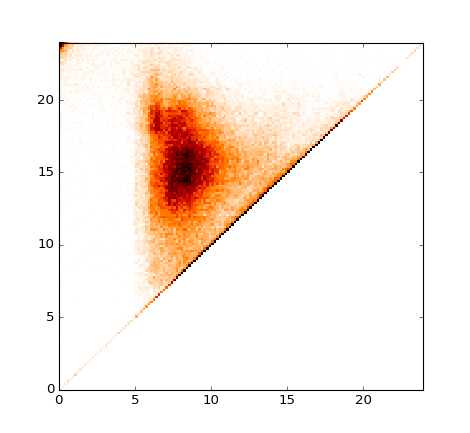

In [238]:
plt.hist2d(tr.tmin/12.0, tr.tmax/12.0, bins=144, cmap='gist_heat_r', vmax=150);